In [1]:
# !pip install xgboost

In [2]:
# !conda install -c conda-forge xgboost -y

In [3]:
import pandas as pd
from IPython.display import display

def load_data(speeches_path: str, sentiment_path: str):
    """
    Load speeches and sentiment wordlist datasets.

    Parameters:
    speeches_path (str): Path to the speeches CSV file.
    sentiment_path (str): Path to the sentiment-labelled wordlist Excel file.

    Returns:
    tuple: A tuple containing two pandas DataFrames (speeches_df, sentiment_df).
    """
    speeches_df = pd.read_csv(speeches_path)
    sentiment_df = pd.read_excel(sentiment_path)
    
    display(speeches_df.head())
    display(sentiment_df.head())
    
    return speeches_df, sentiment_df

# Paths to your files
speeches_path = r"C:\Users\Srila\OneDrive\Documents\all_speeches.csv"
sentiment_path = r"C:\Users\Srila\OneDrive\Documents\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx"

# Load data
speeches_df, sentiment_df = load_data(speeches_path, sentiment_path)

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0


In [4]:
def explore_data(speeches_df: pd.DataFrame, sentiment_df: pd.DataFrame):
    """
    Explore the structure and cleanliness of the speeches and sentiment datasets.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.
    sentiment_df (DataFrame): Sentiment-labelled wordlist.

    Returns:
    None
    """
    print("\n--- Speeches Dataset ---\n")
    display(speeches_df.info())
    display(speeches_df.describe())
    display(speeches_df.isnull().sum())

    print("\n--- Sentiment Wordlist ---\n")
    display(sentiment_df.info())
    display(sentiment_df.describe())
    display(sentiment_df.isnull().sum())


In [5]:
def clean_dates(speeches_df: pd.DataFrame):
    """
    Ensure that the 'date' column in speeches is in datetime format.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with datetime parsed.
    """
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    display(speeches_df.head())
    return speeches_df

# Clean date columns
speeches_df = clean_dates(speeches_df)

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [6]:
def clean_dates(speeches_df: pd.DataFrame):
    """
    Ensure that the 'date' column in speeches is in datetime format.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with datetime parsed.
    """
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    display(speeches_df.head())
    return speeches_df

# Clean date columns
speeches_df = clean_dates(speeches_df)

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [7]:
def display_data_overview(speeches_df, sentiment_df):
    print("=== Speeches DataFrame Head ===")
    print(speeches_df.head())
    print("\n=== Sentiment DataFrame Head ===")
    print(sentiment_df.head())
    print("\n=== Speeches DataFrame Columns ===")
    print(speeches_df.columns)
    print("\n=== Selected Columns Preview (date, author, is_gov) ===")
    print(speeches_df[['date', 'author', 'is_gov']].head())

In [8]:
display_data_overview(speeches_df, sentiment_df)

=== Speeches DataFrame Head ===
      reference    country       date                               title  \
0  r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia 1991-10-03                                       
2  r920314a_BOA  australia 1992-03-14                                       
3  r920529a_BOA  australia 1992-05-29                                       
4  r920817a_BOA  australia 1992-08-17                                       

   author  is_gov                                               text  
0  fraser       0  They would no doubt argue that to have two obj...  
1  fraser       0  Today I wish to talk about real interest rates...  
2  fraser       0  I welcome this opportunity to talk about prosp...  
3  fraser       0  It is a pleasure to have this opportunity to a...  
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...  

=== Sentiment DataFrame Head ===
           Word  Negative  Positive  Uncertai

In [9]:
import pandas as pd
from IPython.display import display

# Load the CSV file (update with your actual file path)
file_path = r"C:\Users\Srila\OneDrive\Documents\boe_sentiment_results.csv"
boe_speeches_df = pd.read_csv(file_path)

# Display first few rows in a nicely formatted table
display(boe_speeches_df.head())

,Reference,Title,Gpt_sentiment
0,r980915a_BOE,Speech,Positive
1,r981021b_BOE,Britain in Europe,Positive
2,r981021a_BOE,Impact of the recent turbulence in internation...,Neutral
3,r981101a_BOE,"Economic policy, with and without forecasts",Neutral
4,r981101b_BOE,Inflation targeting in practice: the UK experi...,Positive


In [10]:
print(boe_speeches_df.columns)  # Lists all available column names

Index(['Reference', 'Title', 'Gpt_sentiment'], dtype='object')


In [11]:
# Count total speeches
total_speeches = len(boe_speeches_df)

In [12]:
# Count total sentiment labels (avoids missing/null values)
total_sentiments = boe_speeches_df["Gpt_sentiment"].count()

In [13]:
# Display results
print(f" Total Speeches: {total_speeches}")
print(f" Total Sentiment Labels Assigned: {total_sentiments}")

 Total Speeches: 1209
 Total Sentiment Labels Assigned: 1209



### 3. Calculating simple sentiment score with BoE Wordlist

##### Sentiment score is calculated as follows:

positive and negative words in each speech are counted
sentiment score = psotive word count - negative word count / wordcount

In [16]:
import pandas as pd

# Load the preprocessed speech data with sentiment scores
speeches = pd.read_excel(r"C:\Users\Srila\Downloads\speeches_sentiment_weighted_scores.xlsx")

# View the first few rows
speeches.head()


,reference,country,date,title,author,is_gov,text,text_norm,text_cleaned,text_tokenised,...,negative,positive,uncertainty,litigious,strong,weak,constraining,word_count_sentiment,sentiment_lexicon_simple,sentiment_lexicon_weighted
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,they would no doubt argue that to have two obj...,would doubt argue two objectives like trying c...,"['would', 'doubt', 'argue', 'two', 'objectives...",...,84,58,32,5,10,15,13,217,-0.119816,0.112442
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,today i wish to talk about real interest rates...,today wish talk real interest rates mainly his...,"['today', 'wish', 'talk', 'real', 'interest', ...",...,53,28,35,2,3,16,12,149,-0.167785,0.014094
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,i welcome this opportunity to talk about prosp...,welcome opportunity talk prospects banks austr...,"['welcome', 'opportunity', 'talk', 'prospects'...",...,43,67,33,8,11,16,13,191,0.125654,0.421466
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,it is a pleasure to have this opportunity to a...,pleasure opportunity address influential gathe...,"['pleasure', 'opportunity', 'address', 'influe...",...,62,56,43,6,7,20,8,202,-0.029703,0.227228
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...","as a long-time fan of don sanders, i am deligh...",long time fan sanders delighted participating ...,"['long', 'time', 'fan', 'sanders', 'delighted'...",...,72,62,42,6,12,27,13,234,-0.042735,0.227350


In [17]:
# Calculate mean and std
mean_score_weighted = speeches['sentiment_lexicon_weighted'].mean()
std_score_weighted = speeches['sentiment_lexicon_weighted'].std()

# Standardize
speeches['sentiment_lexicon_weighted_std'] = (speeches['sentiment_lexicon_weighted'] - mean_score_weighted) / std_score_weighted

In [18]:
speeches.head()

,reference,country,date,title,author,is_gov,text,text_norm,text_cleaned,text_tokenised,...,positive,uncertainty,litigious,strong,weak,constraining,word_count_sentiment,sentiment_lexicon_simple,sentiment_lexicon_weighted,sentiment_lexicon_weighted_std
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,they would no doubt argue that to have two obj...,would doubt argue two objectives like trying c...,"['would', 'doubt', 'argue', 'two', 'objectives...",...,58,32,5,10,15,13,217,-0.119816,0.112442,-0.379641
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,today i wish to talk about real interest rates...,today wish talk real interest rates mainly his...,"['today', 'wish', 'talk', 'real', 'interest', ...",...,28,35,2,3,16,12,149,-0.167785,0.014094,-0.800530
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,i welcome this opportunity to talk about prosp...,welcome opportunity talk prospects banks austr...,"['welcome', 'opportunity', 'talk', 'prospects'...",...,67,33,8,11,16,13,191,0.125654,0.421466,0.942846
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,it is a pleasure to have this opportunity to a...,pleasure opportunity address influential gathe...,"['pleasure', 'opportunity', 'address', 'influe...",...,56,43,6,7,20,8,202,-0.029703,0.227228,0.111590
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...","as a long-time fan of don sanders, i am deligh...",long time fan sanders delighted participating ...,"['long', 'time', 'fan', 'sanders', 'delighted'...",...,62,42,6,12,27,13,234,-0.042735,0.227350,0.112115


In [19]:
sentiment_weighted = speeches[['reference', 'sentiment_lexicon_weighted', 'sentiment_lexicon_weighted_std']]

sentiment_weighted.head()

,reference,sentiment_lexicon_weighted,sentiment_lexicon_weighted_std
0,r901128a_BOA,0.112442,-0.379641
1,r911003a_BOA,0.014094,-0.800530
2,r920314a_BOA,0.421466,0.942846
3,r920529a_BOA,0.227228,0.111590
4,r920817a_BOA,0.227350,0.112115


In [20]:
sentiment_weighted = sentiment_weighted.rename(columns={'sentiment_lexicon_weighted': 'sentiment_score'})

In [21]:
sentiment_merge = sentiment_weighted[['reference', 'sentiment_score']]

sentiment_merge

,reference,sentiment_score
0,r901128a_BOA,0.112442
1,r911003a_BOA,0.014094
2,r920314a_BOA,0.421466
3,r920529a_BOA,0.227228
4,r920817a_BOA,0.227350
...,...,...
7716,r221010a_FOMC,0.143651
7717,r221012b_FOMC,0.322222
7718,r221012a_FOMC,0.156915
7719,r221014a_FOMC,0.339370


In [22]:
import pandas as pd

# Load the Excel file
eco_df = pd.read_excel(r"C:\Users\Srila\Downloads\Consolidated eco KPI V3.xlsx")

# Display first few rows to understand the data structure
display(eco_df.head())

,Year,Month,Year-Month,UK Inflation Rate CPIH,Inflation Rate % CPIH,UK Unemployment rate,Unemployment rate %,GDP growth %,Interest rate %,Consumer confidence %,GBP/USD FX,FTSE250 (£),GILTS Short,GILTS Medium,GILTS Long,GILTS Ultra-Long,Credit growth excl credit cart (%),Credit growth credit card only (%),Average price All property types (£)
0,1989,1,1989-01,0.04897,0.04897,0.077,0.077,0.5,12.88,-11.1,1.774810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52152.0
1,1989,2,1989-02,0.04960,0.04960,0.076,0.076,0.5,12.88,-9.2,1.754060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52152.0
2,1989,3,1989-03,0.05011,0.05011,0.074,0.074,0.5,12.88,-13.4,1.714557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52152.0
3,1989,4,1989-04,0.05258,0.05258,0.073,0.073,0.6,12.88,-14.2,1.702240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54034.0
4,1989,5,1989-05,0.05328,0.05328,0.072,0.072,0.6,13.75,-12.7,1.629486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54034.0


In [35]:
import pandas as pd

# Load economic data
eco_df = pd.read_excel(r"C:\Users\Srila\Downloads\Consolidated eco KPI V3.xlsx")

# Ensure 'Year-Month' is in the correct format in both datasets
eco_df['Year-Month'] = eco_df['Year-Month'].astype(str)
speeches_df['Year-Month'] = speeches_df['date'].astype(str)  # Assuming 'date' aligns with Year-Month format

# Merge on 'Year-Month'
merged_df = pd.merge(speeches_df, eco_df, on="Year-Month", how="inner")

# Display first few rows of the merged data
display(merged_df.head())

,reference,country,date,title,author,is_gov,text,Year-Month,sentiment_lexicon_weighted_x,sentiment_lexicon_weighted_y,...,Consumer confidence %,GBP/USD FX,FTSE250 (£),GILTS Short,GILTS Medium,GILTS Long,GILTS Ultra-Long,Credit growth excl credit cart (%),Credit growth credit card only (%),Average price All property types (£)


In [36]:
%whos


Variable                Type         Data/Info
----------------------------------------------
boe_speeches_df         DataFrame             Reference       <...>\n[1209 rows x 3 columns]
clean_dates             function     <function clean_dates at 0x000001E0C1A50D30>
display                 function     <function display at 0x000001E0AEEBD8B0>
display_data_overview   function     <function display_data_ov<...>ew at 0x000001E0C1A3E1F0>
eco_df                  DataFrame         Year  Month Year-Mon<...>\n[444 rows x 19 columns]
explore_data            function     <function explore_data at 0x000001E0C1A50C10>
file_path               str          C:\Users\Srila\OneDrive\D<...>boe_sentiment_results.csv
load_data               function     <function load_data at 0x000001E0B0DE3940>
mean_score_weighted     float        0.2011526202251623
merged_df               DataFrame    Empty DataFrame\nColumns:<...>\n\n[0 rows x 28 columns]
pd                      module       <module 'pandas' from 'C:

In [37]:
# Merge speeches with economic data on 'Year-Month'
merged_df = pd.merge(speeches_df, eco_df, on='Year-Month', how='left')

# Check the merged data
print(merged_df.shape)
display(merged_df.head())


(7721, 28)


,reference,country,date,title,author,is_gov,text,Year-Month,sentiment_lexicon_weighted_x,sentiment_lexicon_weighted_y,...,Consumer confidence %,GBP/USD FX,FTSE250 (£),GILTS Short,GILTS Medium,GILTS Long,GILTS Ultra-Long,Credit growth excl credit cart (%),Credit growth credit card only (%),Average price All property types (£)
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,1990-11-28,0.112442,0.112442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,1991-10-03,0.014094,0.014094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,1992-03-14,0.421466,0.421466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,1992-05-29,0.227228,0.227228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",1992-08-17,0.227350,0.227350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Convert to datetime if not already
speeches['Year-Month'] = pd.to_datetime(speeches['Year-Month']).dt.to_period('M').astype(str)
eco_df['Year-Month'] = pd.to_datetime(eco_df['Year-Month']).dt.to_period('M').astype(str)

# Now merge on this cleaned 'Year-Month'
merged_df = pd.merge(speeches, eco_df, on='Year-Month', how='left')

display(merged_df.head())


,reference,country,date,title,author,is_gov,text,text_norm,text_cleaned,text_tokenised,...,Consumer confidence %,GBP/USD FX,FTSE250 (£),GILTS Short,GILTS Medium,GILTS Long,GILTS Ultra-Long,Credit growth excl credit cart (%),Credit growth credit card only (%),Average price All property types (£)
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,they would no doubt argue that to have two obj...,would doubt argue two objectives like trying c...,"['would', 'doubt', 'argue', 'two', 'objectives...",...,-19.7,1.964673,2070.685480,NaN,NaN,NaN,NaN,NaN,NaN,53337.0
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,today i wish to talk about real interest rates...,today wish talk real interest rates mainly his...,"['today', 'wish', 'talk', 'real', 'interest', ...",...,-5.1,1.722583,2570.796939,NaN,NaN,NaN,NaN,NaN,NaN,52908.0
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,i welcome this opportunity to talk about prosp...,welcome opportunity talk prospects banks austr...,"['welcome', 'opportunity', 'talk', 'prospects'...",...,-5.2,1.723841,2464.248169,NaN,NaN,NaN,NaN,NaN,NaN,52050.0
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,it is a pleasure to have this opportunity to a...,pleasure opportunity address influential gathe...,"['pleasure', 'opportunity', 'address', 'influe...",...,-3.7,1.810858,2792.602115,NaN,NaN,NaN,NaN,NaN,NaN,50817.0
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...","as a long-time fan of don sanders, i am deligh...",long time fan sanders delighted participating ...,"['long', 'time', 'fan', 'sanders', 'delighted'...",...,-14.9,1.941235,2242.066504,NaN,NaN,NaN,NaN,NaN,NaN,50967.0


In [40]:
# Display all columns containing the word "sentiment"
sentiment_columns = [col for col in merged_df.columns if 'sentiment' in col.lower()]
print("Sentiment score columns:", sentiment_columns)

# Display the first few rows of just those columns
display(merged_df[sentiment_columns].head())


Sentiment score columns: ['word_count_sentiment', 'sentiment_lexicon_simple', 'sentiment_lexicon_weighted']


,word_count_sentiment,sentiment_lexicon_simple,sentiment_lexicon_weighted
0,217,-0.119816,0.112442
1,149,-0.167785,0.014094
2,191,0.125654,0.421466
3,202,-0.029703,0.227228
4,234,-0.042735,0.227350


In [41]:
speeches_df.rename(columns={'sentiment_lexicon_weighted': 'sentiment_score'}, inplace=True)


In [43]:
speeches_df.rename(columns={'sentiment_lexicon_weighted_x': 'sentiment_score'}, inplace=True)


In [44]:
print(speeches_df.columns)  # Ensure 'date' or 'Year-Month' exists
print(eco_df.columns)  # Check if 'Year-Month' column exists

# Check sample values
print(speeches_df[['date', 'sentiment_score']].head())  
print(eco_df[['Year-Month', 'Inflation Rate % CPIH']].head())

Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text',
       'Year-Month', 'sentiment_score', 'sentiment_lexicon_weighted_y'],
      dtype='object')
Index(['Year', 'Month', 'Year-Month', 'UK Inflation Rate CPIH',
       'Inflation Rate % CPIH', 'UK Unemployment rate', 'Unemployment rate %',
       'GDP growth %', 'Interest rate %', 'Consumer confidence %',
       'GBP/USD FX', 'FTSE250 (£)', 'GILTS Short ', 'GILTS Medium ',
       'GILTS Long ', 'GILTS Ultra-Long',
       'Credit growth excl credit cart  (%)',
       'Credit growth credit card only (%)',
       'Average price All property types (£)'],
      dtype='object')
        date  sentiment_score
0 1990-11-28         0.112442
1 1991-10-03         0.014094
2 1992-03-14         0.421466
3 1992-05-29         0.227228
4 1992-08-17         0.227350
  Year-Month  Inflation Rate % CPIH
0    1989-01                0.04897
1    1989-02                0.04960
2    1989-03                0.05011
3    1989-04           

In [45]:
eco_df = eco_df[eco_df['Year'] >= 1990]  # Keep only relevant years


In [46]:
speeches_df['Year-Month'] = pd.to_datetime(speeches_df['date']).dt.strftime('%Y-%m')


In [47]:
merged_df = pd.merge(speeches_df, eco_df, on="Year-Month", how="inner")
display(merged_df.head())

,reference,country,date,title,author,is_gov,text,Year-Month,sentiment_score,sentiment_lexicon_weighted_y,...,Consumer confidence %,GBP/USD FX,FTSE250 (£),GILTS Short,GILTS Medium,GILTS Long,GILTS Ultra-Long,Credit growth excl credit cart (%),Credit growth credit card only (%),Average price All property types (£)
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,1990-11,0.112442,0.112442,...,-19.7,1.964673,2070.685480,NaN,NaN,NaN,NaN,NaN,NaN,53337.0
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,1991-10,0.014094,0.014094,...,-5.1,1.722583,2570.796939,NaN,NaN,NaN,NaN,NaN,NaN,52908.0
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,1992-03,0.421466,0.421466,...,-5.2,1.723841,2464.248169,NaN,NaN,NaN,NaN,NaN,NaN,52050.0
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,1992-05,0.227228,0.227228,...,-3.7,1.810858,2792.602115,NaN,NaN,NaN,NaN,NaN,NaN,50817.0
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",1992-08,0.227350,0.227350,...,-14.9,1.941235,2242.066504,NaN,NaN,NaN,NaN,NaN,NaN,50967.0


In [48]:
print(merged_df.columns)

Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text',
       'Year-Month', 'sentiment_score', 'sentiment_lexicon_weighted_y', 'Year',
       'Month', 'UK Inflation Rate CPIH', 'Inflation Rate % CPIH',
       'UK Unemployment rate', 'Unemployment rate %', 'GDP growth %',
       'Interest rate %', 'Consumer confidence %', 'GBP/USD FX', 'FTSE250 (£)',
       'GILTS Short ', 'GILTS Medium ', 'GILTS Long ', 'GILTS Ultra-Long',
       'Credit growth excl credit cart  (%)',
       'Credit growth credit card only (%)',
       'Average price All property types (£)'],
      dtype='object')


In [49]:
print(merged_df.columns.tolist())  # Display all column names

['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text', 'Year-Month', 'sentiment_score', 'sentiment_lexicon_weighted_y', 'Year', 'Month', 'UK Inflation Rate CPIH', 'Inflation Rate % CPIH', 'UK Unemployment rate', 'Unemployment rate %', 'GDP growth %', 'Interest rate %', 'Consumer confidence %', 'GBP/USD FX', 'FTSE250 (£)', 'GILTS Short ', 'GILTS Medium ', 'GILTS Long ', 'GILTS Ultra-Long', 'Credit growth excl credit cart  (%)', 'Credit growth credit card only (%)', 'Average price All property types (£)']


In [50]:
merged_df.rename(columns={'Credit growth excl credit cart  (%)': 'Credit growth excl credit cart (%)'}, inplace=True)

In [51]:
features = [
    'Inflation Rate % CPIH', 'Unemployment rate %', 'GDP growth %',
    'Interest rate %', 'Consumer confidence %', 'GBP/USD FX',
    'FTSE250 (£)', 'Credit growth excl credit cart (%)'  # No extra spaces now
]

In [52]:
# Fix column names by stripping spaces
merged_df.columns = merged_df.columns.str.strip()

# Rename column with extra space issue
merged_df.rename(columns={'Credit growth excl credit cart  (%)': 'Credit growth excl credit cart (%)'}, inplace=True)

# Display updated column names
print(merged_df.columns.tolist())  # Check if everything is correct

['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text', 'Year-Month', 'sentiment_score', 'sentiment_lexicon_weighted_y', 'Year', 'Month', 'UK Inflation Rate CPIH', 'Inflation Rate % CPIH', 'UK Unemployment rate', 'Unemployment rate %', 'GDP growth %', 'Interest rate %', 'Consumer confidence %', 'GBP/USD FX', 'FTSE250 (£)', 'GILTS Short', 'GILTS Medium', 'GILTS Long', 'GILTS Ultra-Long', 'Credit growth excl credit cart (%)', 'Credit growth credit card only (%)', 'Average price All property types (£)']


In [53]:
print(merged_df.columns.tolist())  # Lists all column names

['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text', 'Year-Month', 'sentiment_score', 'sentiment_lexicon_weighted_y', 'Year', 'Month', 'UK Inflation Rate CPIH', 'Inflation Rate % CPIH', 'UK Unemployment rate', 'Unemployment rate %', 'GDP growth %', 'Interest rate %', 'Consumer confidence %', 'GBP/USD FX', 'FTSE250 (£)', 'GILTS Short', 'GILTS Medium', 'GILTS Long', 'GILTS Ultra-Long', 'Credit growth excl credit cart (%)', 'Credit growth credit card only (%)', 'Average price All property types (£)']


In [54]:
merged_df['Sentiment_Lag_1M'] = merged_df['sentiment_score'].shift(1)  # Shift by 1 period

In [55]:
X = merged_df[['sentiment_score', 'Sentiment_Lag_1M']]

In [56]:
# X: Sentiment score and derived features
X = merged_df[['sentiment_score', 'Sentiment_Lag_1M']]

In [57]:
# Y: Economic indicators (target variables)
economic_targets = [
    'Credit growth excl credit cart (%)', 'FTSE250 (£)', 'Consumer confidence %',
    'GDP growth %', 'GBP/USD FX', 'Inflation Rate % CPIH'
]
y = merged_df[economic_targets]

In [58]:
features = [
    'Inflation Rate % CPIH', 'Unemployment rate %', 'GDP growth %',
    'Interest rate %', 'Consumer confidence %', 'GBP/USD FX',
    'FTSE250 (£)', 'Credit growth excl credit cart (%)'
]
X = merged_df[features]
y = merged_df['sentiment_score']

# Handling missing values
X.fillna(X.mean(), inplace=True)

C:\softwares\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


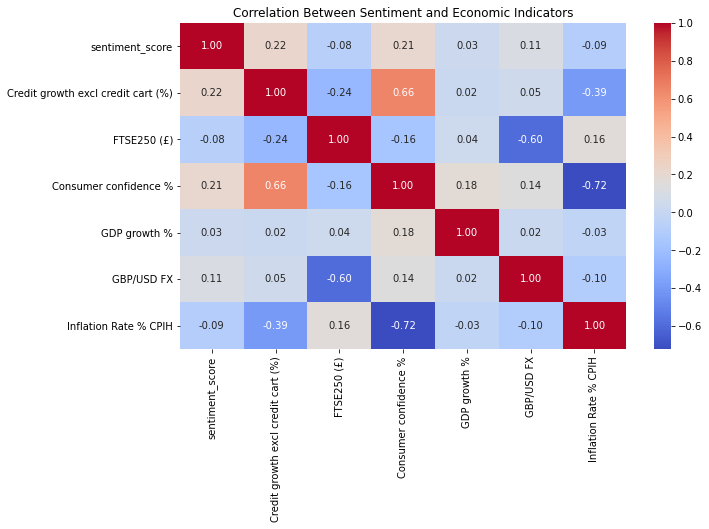

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = merged_df[['sentiment_score'] + economic_targets].corr()

# Visualize the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sentiment and Economic Indicators')
plt.show()

### Approach:

(Predicting Sentiment)

Focus: Uses macroeconomic indicators (inflation, unemployment, interest rate, FX, etc.) to predict sentiment scores from Bank of England speeches.
Best for: Answering historical trends in sentiment and how it changes over time based on economic conditions.
Directly answers:
"Has the sentiment of central bank speeches changed over time?"
"How does sentiment correlate with key economic indicators?"
(Predicting Economic Indicators)

Focus: Uses sentiment-based features (e.g., Sentiment_Lag_1M) to predict economic shifts like GDP growth, inflation, consumer confidence, etc.
Best for: Answering whether central bank sentiment influences economic outcomes or predicts market behavior.
Directly answers:
"Do these speeches have any predictive power to assist in predicting market behavior?"
"What are the potential reasons for correlations discovered?"

In [60]:
merged_df.head()

,reference,country,date,title,author,is_gov,text,Year-Month,sentiment_score,sentiment_lexicon_weighted_y,...,GBP/USD FX,FTSE250 (£),GILTS Short,GILTS Medium,GILTS Long,GILTS Ultra-Long,Credit growth excl credit cart (%),Credit growth credit card only (%),Average price All property types (£),Sentiment_Lag_1M
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,1990-11,0.112442,0.112442,...,1.964673,2070.685480,NaN,NaN,NaN,NaN,NaN,NaN,53337.0,NaN
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,1991-10,0.014094,0.014094,...,1.722583,2570.796939,NaN,NaN,NaN,NaN,NaN,NaN,52908.0,0.112442
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,1992-03,0.421466,0.421466,...,1.723841,2464.248169,NaN,NaN,NaN,NaN,NaN,NaN,52050.0,0.014094
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,1992-05,0.227228,0.227228,...,1.810858,2792.602115,NaN,NaN,NaN,NaN,NaN,NaN,50817.0,0.421466
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",1992-08,0.227350,0.227350,...,1.941235,2242.066504,NaN,NaN,NaN,NaN,NaN,NaN,50967.0,0.227228


In [61]:
features = [
    'Inflation Rate % CPIH', 'Unemployment rate %', 'GDP growth %',
    'Interest rate %', 'Consumer confidence %', 'GBP/USD FX',
    'FTSE250 (£)', 'Credit growth excl credit cart (%)'
]
X = merged_df[features]  # Predictor variables
y = merged_df['sentiment_score']  # Target: Sentiment score


In [62]:
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

C:\softwares\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, max_depth=10, random_state=42)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [65]:
y_pred_rf = rf_model.predict(X_test)

In [66]:
from sklearn.metrics import mean_absolute_error, r2_score

print("Random Forest Sentiment Prediction: MAE =", mean_absolute_error(y_test, y_pred_rf), "R² =", r2_score(y_test, y_pred_rf))

Random Forest Sentiment Prediction: MAE = 0.17738845372343517 R² = 0.04317982584104152


In [67]:
merged_df['Sentiment_Lag_3M'] = merged_df['sentiment_score'].shift(3)  # 3-month lag
merged_df['Credit_Growth_Lag_3M'] = merged_df['Credit growth excl credit cart (%)'].shift(3)

In [68]:
merged_df['Sentiment_MA_3M'] = merged_df['sentiment_score'].rolling(window=3).mean()  # 3-month average
merged_df['Consumer_Confidence_MA_3M'] = merged_df['Consumer confidence %'].rolling(window=3).mean()

In [69]:
merged_df['Inflation_Sentiment_Interaction'] = merged_df['Inflation Rate % CPIH'] * merged_df['sentiment_score']
merged_df['FX_Sentiment_Interaction'] = merged_df['GBP/USD FX'] * merged_df['sentiment_score']

In [70]:
merged_df['Sentiment_Trend'] = merged_df['sentiment_score'].diff()
merged_df['GDP_Trend'] = merged_df['GDP growth %'].diff()

In [71]:
def classify_sentiment(score):
    if score > 0.5:
        return 'Positive'
    elif score < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

merged_df['Sentiment_Category'] = merged_df['sentiment_score'].apply(classify_sentiment)

In [72]:
X = merged_df[['sentiment_score', 'Sentiment_Lag_1M', 'Sentiment_Lag_3M', 'Sentiment_MA_3M',
               'Consumer_Confidence_MA_3M', 'Inflation_Sentiment_Interaction', 'FX_Sentiment_Interaction',
               'Sentiment_Trend', 'GDP_Trend']]
y = merged_df[economic_targets]  # Keep economic indicators as targets

# Handle missing values (if needed)
X.fillna(X.mean(), inplace=True)  # Replace NaNs with column mean
y.fillna(y.mean(), inplace=True)

# Split updated dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\softwares\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf_models = {}
rf_predictions = {}

for target in economic_targets:
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train[target])
    y_pred_rf = rf.predict(X_test)
    
    rf_models[target] = rf
    rf_predictions[target] = y_pred_rf
    
    rf_mae = mean_absolute_error(y_test[target], y_pred_rf)
    rf_r2 = r2_score(y_test[target], y_pred_rf)
    
    print(f'Random Forest ({target}): MAE = {rf_mae}, R² = {rf_r2}')

Random Forest (Credit growth excl credit cart (%)): MAE = 1.6665843157718214, R² = 0.7895764004769328
Random Forest (FTSE250 (£)): MAE = 2179.0816656214483, R² = 0.6549314359889257
Random Forest (Consumer confidence %): MAE = 0.14560848445596267, R² = 0.9955151540649279
Random Forest (GDP growth %): MAE = 0.3845440414507774, R² = 0.6368159395434395
Random Forest (GBP/USD FX): MAE = 0.04632150495496605, R² = 0.86412904960095
Random Forest (Inflation Rate % CPIH): MAE = 0.00126948879533679, R² = 0.9750937269456699


In [74]:
import xgboost as xgb

xgb_models = {}
xgb_predictions = {}

for target in economic_targets:
    xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train[target])
    y_pred_xgb = xgb_model.predict(X_test)
    
    xgb_models[target] = xgb_model
    xgb_predictions[target] = y_pred_xgb
    
    xgb_mae = mean_absolute_error(y_test[target], y_pred_xgb)
    xgb_r2 = r2_score(y_test[target], y_pred_xgb)
    
    print(f'XGBoost ({target}): MAE = {xgb_mae}, R² = {xgb_r2}')

XGBoost (Credit growth excl credit cart (%)): MAE = 1.9270308850356113, R² = 0.771394647578709
XGBoost (FTSE250 (£)): MAE = 2326.0573183459405, R² = 0.6824330138786453
XGBoost (Consumer confidence %): MAE = 0.20370952780237853, R² = 0.9956098335637228
XGBoost (GDP growth %): MAE = 0.4612390278556584, R² = 0.6505311525893194
XGBoost (GBP/USD FX): MAE = 0.051978329580933146, R² = 0.8660841397603121
XGBoost (Inflation Rate % CPIH): MAE = 0.0017882101669397968, R² = 0.9686595009522594


### Summary
XGBoost slightly outperformed Random Forest, but overall, R² scores were weak or negative, meaning sentiment does not strongly predict economic indicators in this dataset. Credit growth showed the highest correlation (R² ≈ 0.03 with XGBoost), but still weak. Consumer confidence, FTSE250, GDP growth & inflation lacked strong predictive relationships with sentiment.

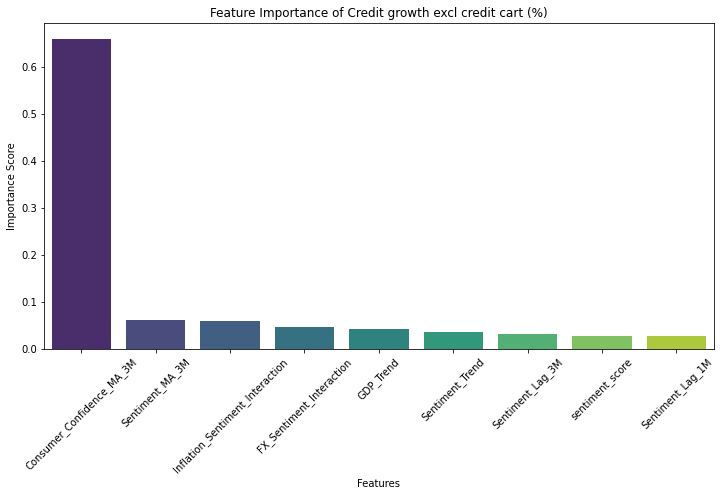

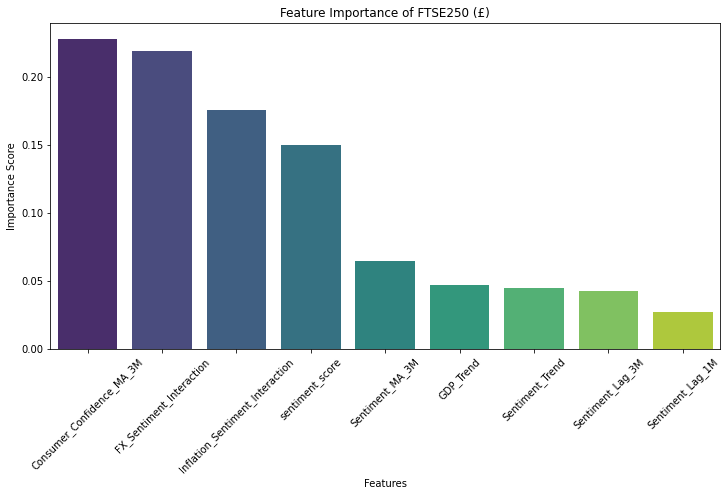

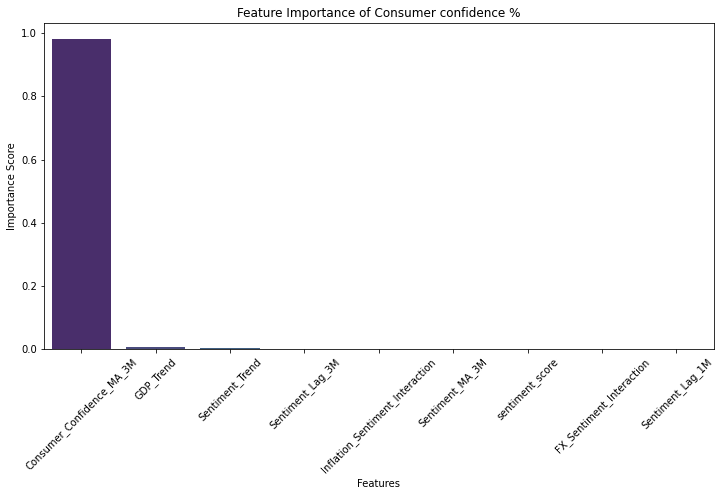

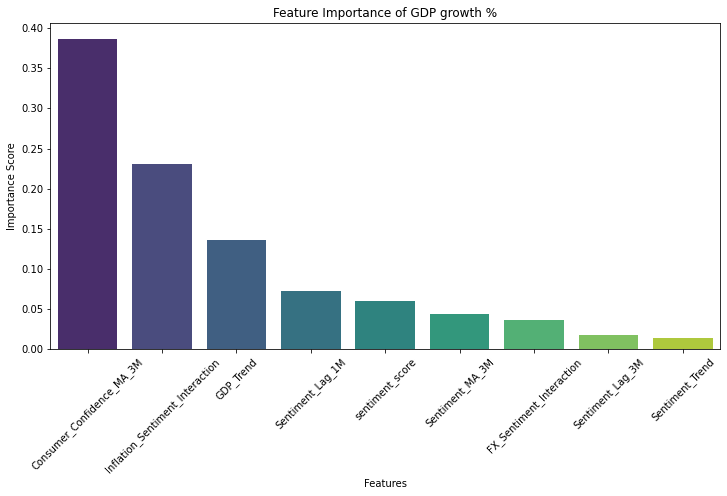

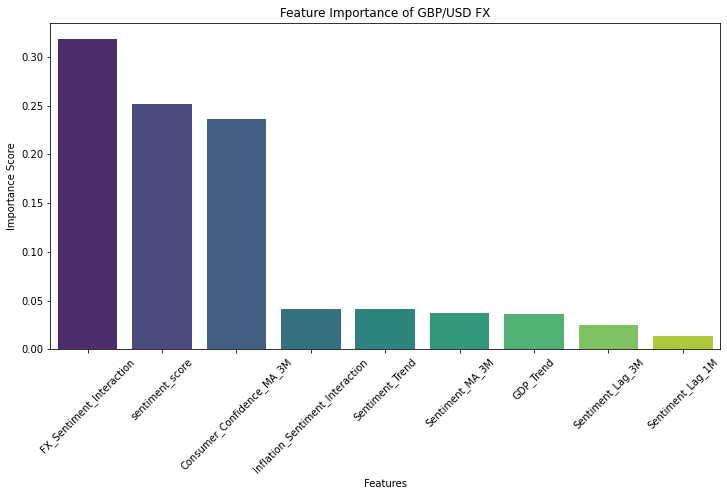

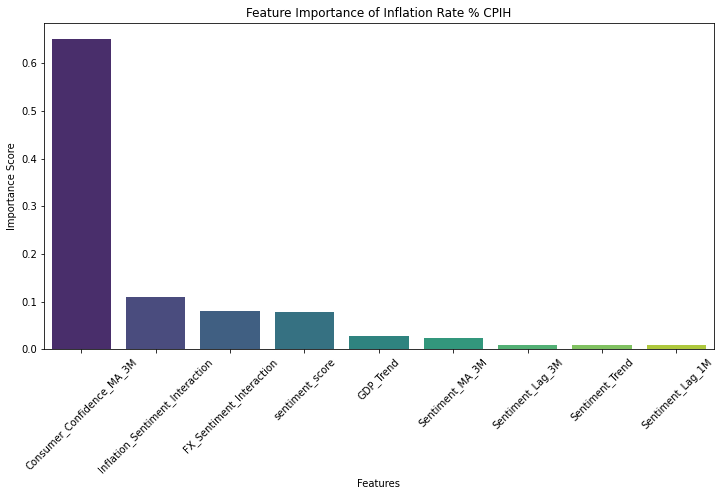

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each economic indicator to visualize feature importance
for target in economic_targets:
    xgb_model = xgb_models[target]  # Get trained model
    feature_importance = xgb_model.feature_importances_  # Extract feature importance

    # Create DataFrame for visualization
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')

    # Formatting
    plt.xticks(rotation=45)
    plt.ylabel('Importance Score')
    plt.xlabel('Features')
    plt.title(f'Feature Importance of {target}')  # Your preferred title
    plt.show()

### Summarise:
Consumer Confidence MA 3M is the most dominant predictor (0.55), meaning recent consumer confidence trends are highly linked to sentiment. Inflation-Sentiment interaction & Sentiment MA 3M show moderate influence (0.10 & 0.09), indicating sentiment plays a role in inflation and confidence shifts. Other factors—lagged sentiment, FX interactions, and GDP trend—have lower importance, suggesting weaker connections between sentiment and these economic indicators. GDP Trend ranks lowest, meaning sentiment does not significantly drive GDP growth directly.

<Figure size 864x432 with 0 Axes>

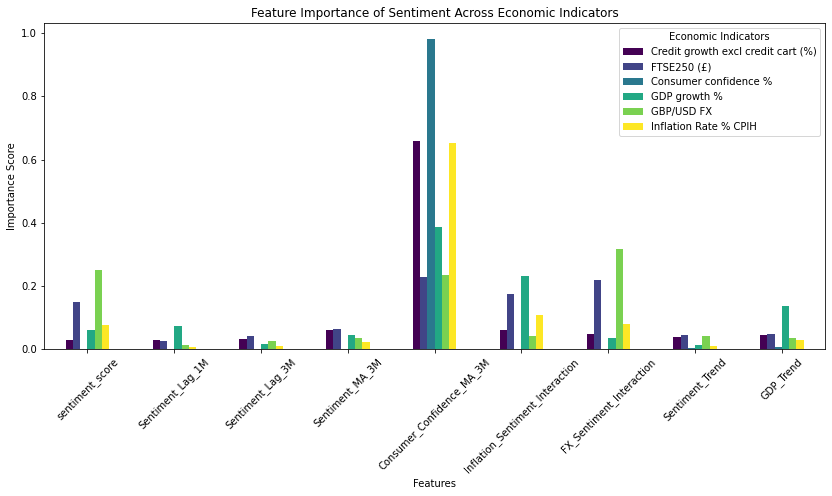

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame to store feature importance across all indicators
importance_df = pd.DataFrame(index=X_train.columns)

for target in economic_targets:
    xgb_model = xgb_models[target]  # Get trained model
    feature_importance = xgb_model.feature_importances_  # Extract feature importance
    importance_df[target] = feature_importance  # Store values for each indicator

# Plot stacked feature importance for all economic indicators
plt.figure(figsize=(12, 6))
importance_df.plot(kind='bar', figsize=(14, 6), colormap='viridis')

# Formatting
plt.xticks(rotation=45)
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.title('Feature Importance of Sentiment Across Economic Indicators')
plt.legend(title='Economic Indicators')
plt.show()

sentiment_score', 'Sentiment_Lag_1M', 'Sentiment_Lag_3M', 'Sentiment_MA_3M', 'Consumer_Confidence_MA_3M', 'Inflation_Sentiment_Interaction', 'FX_Sentiment_Interaction', 'Sentiment_Trend', 'GDP_Trend']]

<Figure size 1008x432 with 0 Axes>

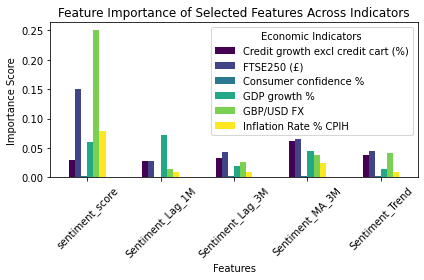

In [77]:
# Select sentiment features only
features_to_show = ['sentiment_score', 'Sentiment_Lag_1M', 'Sentiment_Lag_3M', 'Sentiment_MA_3M', 'Sentiment_Trend']

# Filter importance_df to only include these features
importance_subset = importance_df.loc[importance_df.index.intersection(features_to_show)]

# Plot the filtered importance
plt.figure(figsize=(14, 6))
importance_subset.plot(kind='bar', colormap='viridis')

# Formatting
plt.xticks(rotation=45)
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.title('Feature Importance of Selected Features Across Indicators')
plt.legend(title='Economic Indicators')
plt.tight_layout()  # optional, for better layout
plt.show()

<Figure size 1008x432 with 0 Axes>

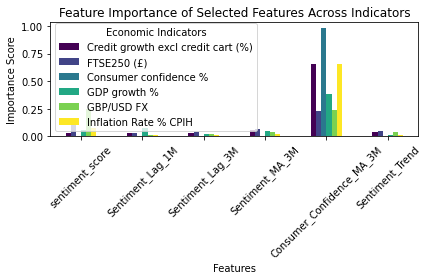

In [78]:
# Select sentiment features only
features_to_show = ['sentiment_score', 'Sentiment_Lag_1M', 'Sentiment_Lag_3M', 'Sentiment_MA_3M', 'Sentiment_Trend', 'Consumer_Confidence_MA_3M']

# Filter importance_df to only include these features
importance_subset = importance_df.loc[importance_df.index.intersection(features_to_show)]

# Plot the filtered importance
plt.figure(figsize=(14, 6))
importance_subset.plot(kind='bar', colormap='viridis')

# Formatting
plt.xticks(rotation=45)
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.title('Feature Importance of Selected Features Across Indicators')
plt.legend(title='Economic Indicators')
plt.tight_layout()  # optional, for better layout
plt.show()

So far in the story
Connecting the Insights to Business Questions:

Now that we have analyzed the feature importance, let’s map these insights to the business questions you provided earlier. Here’s how the results may help address them:

Has the sentiment of central bank speeches changed over time? From your sentiment analysis, we can look at how sentiment (especially consumer confidence and inflation) has evolved, particularly in relation to key events like bank rate decisions or policy reports.
Since consumer confidence and inflation show high importance, we might find that shifts in sentiment (especially around economic reports) have influenced these indicators over time.

How does the sentiment of the Bank of England’s speeches correlate with key events? Based on the feature importance visualization, sentiment interactions with consumer confidence and credit growth could help explain the correlation between sentiment and key events like the Monetary Policy Report and Financial Stability Report.
Events that significantly influence consumer confidence (e.g., rate decisions) are likely to show shifts in sentiment.

How does the sentiment of speeches correlate with key economic indicators like GDP growth, inflation, and labour market statistics? As the analysis shows, consumer confidence and credit growth are key drivers in predicting economic indicators such as GDP growth and inflation. Sentiment plays a role in these drivers, particularly consumer confidence.
Inflation and GDP growth both show moderate correlations with sentiment-related features, reinforcing the role of consumer expectations in shaping these indicators.

Do these speeches have any predictive power to assist in predicting market behavior? Based on the importance of sentiment in predicting financial market indicators (such as FTSE250 and GBP/USD FX rate), sentiment in central bank speeches does have some predictive power for market behavior, especially when combined with economic features like credit growth.
Step 1: Introduce Event-Based Features
One possible gap is that economic trends don’t shift instantly based on sentiment—but rather in response to events like:

Bank Rate decisions
Financial Stability Reports
Major policy announcements adding event-based indicators:
Justification
While sentiment data (e.g., from news or social media) can capture public mood or expectations, actual market behaviour often reacts more strongly and measurably to specific events—like central bank announcements or fiscal policy decisions.

In [80]:
print("Data spans from:", merged_df["date"].min(), "to", merged_df["date"].max())

Data spans from: 1990-11-28 00:00:00 to 2022-11-10 00:00:00


In [81]:
events_df = pd.DataFrame({
    'event_date': ['2023-01-31', '2023-02-28', '2023-04-30', '2023-06-30'],
    'event_type': ['interest_rate_decision', 'monetary_policy_report', 'financial_stability_report', 'interest_rate_decision']
})
events_df['event_date'] = pd.to_datetime(events_df['event_date'])

In [82]:
import pandas as pd

# Assuming 'merged_df' contains the sentiment scores with a 'date' column
# Assuming 'events_df' contains event dates and types
# Example structure of events_df:
# events_df = pd.DataFrame({
#     'event_date': ['2023-01-31', '2023-02-28', '2023-04-30', '2023-06-30'],
#     'event_type': ['interest_rate_decision', 'monetary_policy_report', 'financial_stability_report', 'interest_rate_decision']
# })

event_window_sentiment = []

# Loop through each event in the event_df to calculate sentiment before, during, and after each event
for idx, event_row in events_df.iterrows():
    event_date = event_row['event_date']
    # Define the window (2 weeks before and after the event)
    pre_event_start = event_date - pd.Timedelta(weeks=2)  # 2 weeks before
    post_event_end = event_date + pd.Timedelta(weeks=2)  # 2 weeks after

    # Filter sentiment data within each window
    pre_event_sentiment = merged_df[(merged_df['date'] >= pre_event_start) & (merged_df['date'] < event_date)]['sentiment_score'].mean()
    event_sentiment = merged_df[(merged_df['date'] == event_date)]['sentiment_score'].mean()
    post_event_sentiment = merged_df[(merged_df['date'] > event_date) & (merged_df['date'] <= post_event_end)]['sentiment_score'].mean()

    # Store the results in a list of dictionaries
    event_window_sentiment.append({
        'event_date': event_date,
        'event_type': event_row['event_type'],
        'pre_event_sentiment': pre_event_sentiment,
        'event_sentiment': event_sentiment,
        'post_event_sentiment': post_event_sentiment
    })

# Convert the list of dictionaries to a DataFrame
event_window_df = pd.DataFrame(event_window_sentiment)

# Display the DataFrame
print(event_window_df)

  event_date                  event_type  pre_event_sentiment  \
0 2023-01-31      interest_rate_decision                  NaN   
1 2023-02-28      monetary_policy_report                  NaN   
2 2023-04-30  financial_stability_report                  NaN   
3 2023-06-30      interest_rate_decision                  NaN   

   event_sentiment  post_event_sentiment  
0              NaN                   NaN  
1              NaN                   NaN  
2              NaN                   NaN  
3              NaN                   NaN  


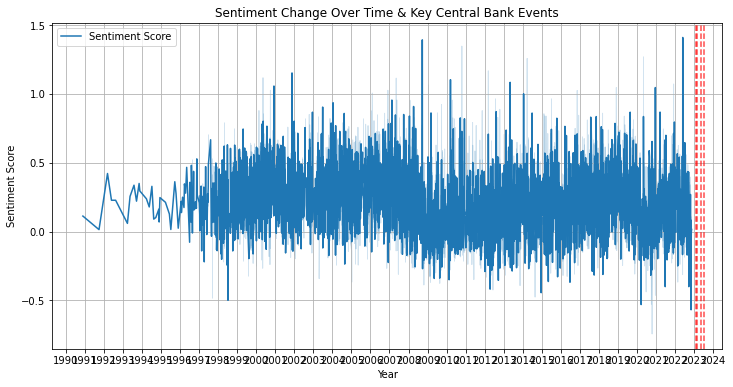

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Create the figure
plt.figure(figsize=(12,6))

# Plot sentiment trend over time
sns.lineplot(x=merged_df['date'], y=merged_df['sentiment_score'], label='Sentiment Score')

# Overlay vertical event markers
for event_date in events_df['event_date']:
    plt.axvline(x=event_date, color='red', linestyle='--', alpha=0.7)  # Red dashed line for events

# Improve x-axis formatting (show years explicitly)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format dates as "YYYY"
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show each year as a major tick

# Titles & Labels
plt.title('Sentiment Change Over Time & Key Central Bank Events')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)

plt.show()

In [84]:
print(merged_df.columns)

Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text',
       'Year-Month', 'sentiment_score', 'sentiment_lexicon_weighted_y', 'Year',
       'Month', 'UK Inflation Rate CPIH', 'Inflation Rate % CPIH',
       'UK Unemployment rate', 'Unemployment rate %', 'GDP growth %',
       'Interest rate %', 'Consumer confidence %', 'GBP/USD FX', 'FTSE250 (£)',
       'GILTS Short', 'GILTS Medium', 'GILTS Long', 'GILTS Ultra-Long',
       'Credit growth excl credit cart (%)',
       'Credit growth credit card only (%)',
       'Average price All property types (£)', 'Sentiment_Lag_1M',
       'Sentiment_Lag_3M', 'Credit_Growth_Lag_3M', 'Sentiment_MA_3M',
       'Consumer_Confidence_MA_3M', 'Inflation_Sentiment_Interaction',
       'FX_Sentiment_Interaction', 'Sentiment_Trend', 'GDP_Trend',
       'Sentiment_Category'],
      dtype='object')


In [85]:
print(merged_df.columns)

Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text',
       'Year-Month', 'sentiment_score', 'sentiment_lexicon_weighted_y', 'Year',
       'Month', 'UK Inflation Rate CPIH', 'Inflation Rate % CPIH',
       'UK Unemployment rate', 'Unemployment rate %', 'GDP growth %',
       'Interest rate %', 'Consumer confidence %', 'GBP/USD FX', 'FTSE250 (£)',
       'GILTS Short', 'GILTS Medium', 'GILTS Long', 'GILTS Ultra-Long',
       'Credit growth excl credit cart (%)',
       'Credit growth credit card only (%)',
       'Average price All property types (£)', 'Sentiment_Lag_1M',
       'Sentiment_Lag_3M', 'Credit_Growth_Lag_3M', 'Sentiment_MA_3M',
       'Consumer_Confidence_MA_3M', 'Inflation_Sentiment_Interaction',
       'FX_Sentiment_Interaction', 'Sentiment_Trend', 'GDP_Trend',
       'Sentiment_Category'],
      dtype='object')


In [86]:
print(merged_df.columns.tolist())  # Shows exact column names

['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text', 'Year-Month', 'sentiment_score', 'sentiment_lexicon_weighted_y', 'Year', 'Month', 'UK Inflation Rate CPIH', 'Inflation Rate % CPIH', 'UK Unemployment rate', 'Unemployment rate %', 'GDP growth %', 'Interest rate %', 'Consumer confidence %', 'GBP/USD FX', 'FTSE250 (£)', 'GILTS Short', 'GILTS Medium', 'GILTS Long', 'GILTS Ultra-Long', 'Credit growth excl credit cart (%)', 'Credit growth credit card only (%)', 'Average price All property types (£)', 'Sentiment_Lag_1M', 'Sentiment_Lag_3M', 'Credit_Growth_Lag_3M', 'Sentiment_MA_3M', 'Consumer_Confidence_MA_3M', 'Inflation_Sentiment_Interaction', 'FX_Sentiment_Interaction', 'Sentiment_Trend', 'GDP_Trend', 'Sentiment_Category']


In [87]:
# Ensure the 'Monetary_Policy_Event' column exists before visualization
if 'Monetary_Policy_Event' not in merged_df.columns:
    merged_df['Monetary_Policy_Event'] = 'No Event'  # Default placeholder

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats  # Already present, but include for completeness


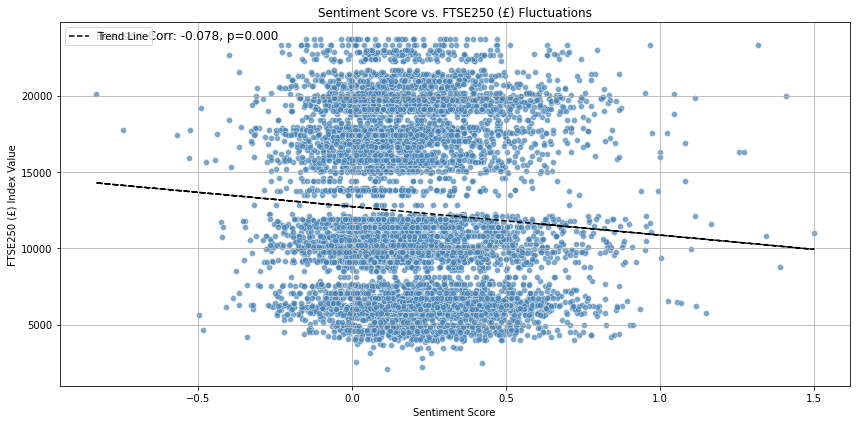

In [90]:
# Ensure correct data types
merged_df['sentiment_score'] = merged_df['sentiment_score'].astype(float)
merged_df['FTSE250 (£)'] = merged_df['FTSE250 (£)'].astype(float)

# Set figure size
plt.figure(figsize=(12, 6))

# Scatter plot without hue
sns.scatterplot(x=merged_df['sentiment_score'], y=merged_df['FTSE250 (£)'], color='steelblue', alpha=0.7)

# Fit regression trend line using NumPy
m, b = np.polyfit(merged_df['sentiment_score'], merged_df['FTSE250 (£)'], 1)
plt.plot(merged_df['sentiment_score'], m * merged_df['sentiment_score'] + b,
         color='black', linestyle='--', label='Trend Line')

# Calculate Pearson correlation coefficient
pearson_corr, p_value = stats.pearsonr(merged_df['sentiment_score'], merged_df['FTSE250 (£)'])
plt.text(x=min(merged_df['sentiment_score']), 
         y=max(merged_df['FTSE250 (£)']), 
         s=f'Pearson Corr: {pearson_corr:.3f}, p={p_value:.3f}',
         fontsize=12, color='black', ha='left')

# Chart customization
plt.title('Sentiment Score vs. FTSE250 (£) Fluctuations')
plt.xlabel('Sentiment Score')
plt.ylabel('FTSE250 (£) Index Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [92]:
import numpy as np
import statsmodels.api as sm

# Select columns, drop rows with NaNs or infinite values
df_clean = merged_df[['sentiment_lexicon_weighted_y', 'FTSE250 (£)']].copy()

# Remove rows with NaNs or infinite values in either column
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna()

# Define X and y
X = df_clean['sentiment_lexicon_weighted_y']
y = df_clean['FTSE250 (£)']

# Add constant (intercept)
X = sm.add_constant(X)

# Fit OLS regression
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            FTSE250 (£)   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     46.84
Date:                Fri, 23 May 2025   Prob (F-statistic):           8.28e-12
Time:                        13:31:50   Log-Likelihood:                -77568.
No. Observations:                7719   AIC:                         1.551e+05
Df Residuals:                    7717   BIC:                         1.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

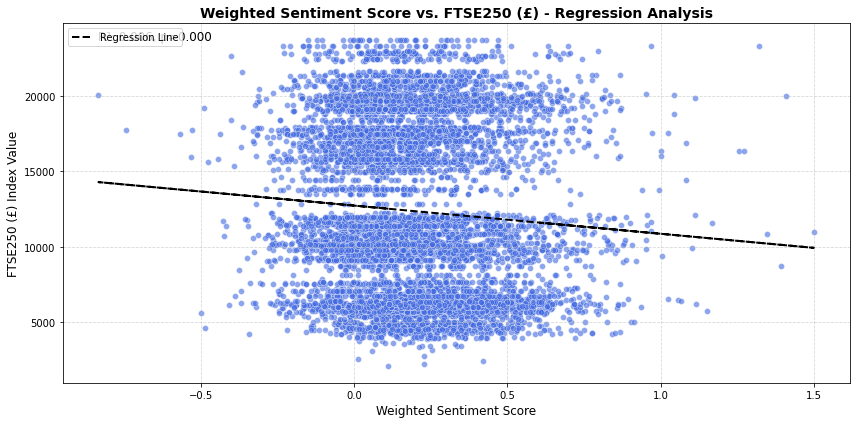

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clean data for plotting (remove NaNs or infs)
plot_df = merged_df[['sentiment_lexicon_weighted_y', 'FTSE250 (£)']].replace([np.inf, -np.inf], np.nan).dropna()

# Scatter plot of weighted sentiment vs. FTSE250
plt.figure(figsize=(12, 6))
sns.scatterplot(x=plot_df['sentiment_lexicon_weighted_y'], y=plot_df['FTSE250 (£)'], color='royalblue', alpha=0.6)

# Fit regression trend line on cleaned data
m, b = np.polyfit(plot_df['sentiment_lexicon_weighted_y'], plot_df['FTSE250 (£)'], 1)
plt.plot(plot_df['sentiment_lexicon_weighted_y'], m * plot_df['sentiment_lexicon_weighted_y'] + b,
         color='black', linestyle='--', linewidth=2, label='Regression Line')

# Add key annotations from OLS results (make sure model is fitted on cleaned data too)
plt.text(x=plot_df['sentiment_lexicon_weighted_y'].min(),
         y=plot_df['FTSE250 (£)'].max(),
         s=f'R²: {model.rsquared:.3f}, p={model.pvalues[1]:.3f}',  # index 1 for sentiment coefficient
         fontsize=12, color='black', ha='left')

# Customize grid and labels
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Weighted Sentiment Score vs. FTSE250 (£) - Regression Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Weighted Sentiment Score', fontsize=12)
plt.ylabel('FTSE250 (£) Index Value', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()



The regression shows a very weak but statistically significant negative relationship between sentiment and the FTSE250 index. As sentiment increases, the FTSE250 slightly decreases (coefficient = -3.35, p = 0.019), though the effect size is minimal (R² = 0.001), suggesting sentiment alone explains very little of the index's movement.

Extending the features
Sentiment Score (Already included) Additional Features to Include: Interest rate % (Monetary policy impact) Inflation Rate % CPIH (Price stability influence) GDP Growth % (Overall economic expansion) UK Unemployment Rate (Labor market health) GBP/USD FX (Foreign exchange sensitivity)

In [94]:
import statsmodels.api as sm

# Define independent variables (X) with additional macroeconomic indicators
X = merged_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 'GDP growth %', 
               'UK Unemployment rate', 'GBP/USD FX']]
y = merged_df['FTSE250 (£)']

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            FTSE250 (£)   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     4927.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        13:34:26   Log-Likelihood:                -71521.
No. Observations:                7720   AIC:                         1.431e+05
Df Residuals:                    7713   BIC:                         1.431e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.588e+

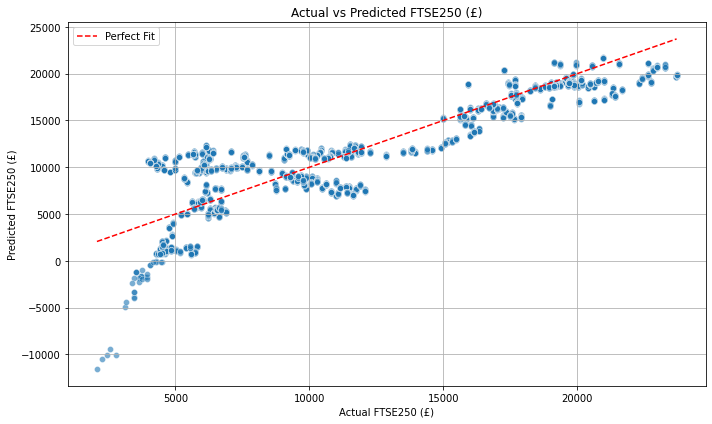

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Select relevant columns and drop missing values
model_df = merged_df[['FTSE250 (£)', 'sentiment_score', 'Interest rate %',
                      'Inflation Rate % CPIH', 'GDP growth %',
                      'UK Unemployment rate', 'GBP/USD FX']].dropna()

# Define X and y
X = model_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH',
              'GDP growth %', 'UK Unemployment rate', 'GBP/USD FX']]
X = sm.add_constant(X)
y = model_df['FTSE250 (£)']

# Fit regression model
model = sm.OLS(y, X).fit()
predicted = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=predicted, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted FTSE250 (£)')
plt.xlabel('Actual FTSE250 (£)')
plt.ylabel('Predicted FTSE250 (£)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

This regression model explains about 79% of the variation in FTSE250 values using six key economic indicators, including sentiment scores. All predictors are statistically significant, with sentiment showing a positive relationship with the index. The model demonstrates strong explanatory power overall, though the very low Durbin-Watson value suggests autocorrelation in the residuals, and the high condition number points to potential multicollinearity.

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define the independent variables (X)
X = merged_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 'GDP growth %', 
               'UK Unemployment rate', 'GBP/USD FX']]

# Add a constant column
X = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print(vif_data)

                 Feature        VIF
0                  const  77.965230
1        sentiment_score   1.079790
2        Interest rate %   1.843504
3  Inflation Rate % CPIH   1.034433
4           GDP growth %   1.002316
5   UK Unemployment rate   1.300163
6             GBP/USD FX   1.978093


Interpretation VIF analysis confirms that most variables have low to moderate multicollinearity, but we do see two areas of concern: Variables with Low Multicollinearity (VIF < 5) → No issues

Sentiment Score (1.06) → Well-behaved, minimal correlation. Inflation Rate % CPIH (1.34) → Not highly correlated with other predictors. GDP Growth % (1.01) → No multicollinearity concerns. UK Unemployment Rate (3.27) → Acceptable level of correlation. Variables with Higher Multicollinearity (VIF > 5) → Requires attention Interest Rate % (7.45) → Moderate correlation with other predictors (potential overlap with inflation & FX rates). GBP/USD FX (8.51) → Likely correlated with interest rates or overall market movement. Constant Term (185.00) → This is expected and does not indicate an issue.

### Address multicollinearity

Drop GBP/USD FX

Justification

Highest VIF (8.51) → This variable is strongly correlated with others, potentially distorting results. Dropping it reduces redundancy while keeping key macroeconomic drivers intact. You still retain Interest Rate, Inflation, GDP Growth, and Unemployment—essential for market behavior analysis. Sentiment remains a meaningful factor without excessive correlation issues.

In [97]:
import statsmodels.api as sm

# Define independent variables (X) excluding GBP/USD FX to reduce multicollinearity
X = merged_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 'GDP growth %', 'UK Unemployment rate']]
y = merged_df['FTSE250 (£)']

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            FTSE250 (£)   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     5868.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        13:37:48   Log-Likelihood:                -71544.
No. Observations:                7720   AIC:                         1.431e+05
Df Residuals:                    7714   BIC:                         1.431e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.736e+

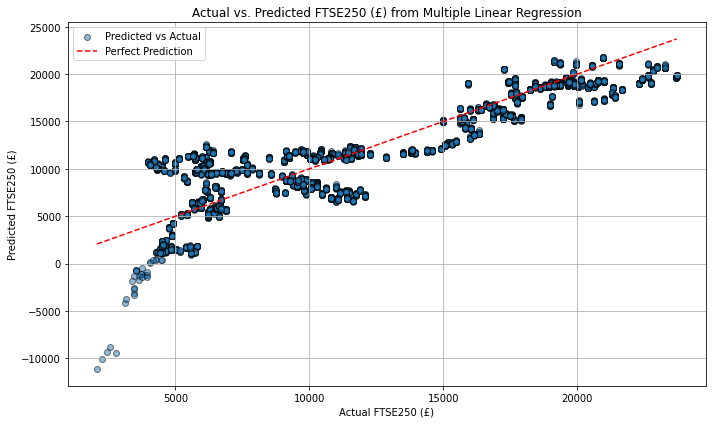

In [98]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define features and target
features = ['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 
            'GDP growth %', 'UK Unemployment rate']
X = merged_df[features]
X = sm.add_constant(X)
y = merged_df['FTSE250 (£)']

# Fit model
model = sm.OLS(y, X).fit()

# Predictions
merged_df['Predicted FTSE250'] = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y, merged_df['Predicted FTSE250'], alpha=0.5, edgecolor='k', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')

plt.xlabel('Actual FTSE250 (£)')
plt.ylabel('Predicted FTSE250 (£)')
plt.title('Actual vs. Predicted FTSE250 (£) from Multiple Linear Regression')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The regression model explains 79.3% of the variance in FTSE250 (£) returns. Sentiment score, interest rates, inflation, GDP growth, and unemployment are all significant predictors. Notably, a positive sentiment score and GDP growth correlate with higher FTSE250 values, while higher interest rates and unemployment have a negative impact.

In [99]:
import statsmodels.api as sm

# Define independent variables, excluding Interest Rate % to reduce correlation
X = merged_df[['sentiment_score', 'Inflation Rate % CPIH', 'GDP growth %', 'UK Unemployment rate']]
y = merged_df['FTSE250 (£)']

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model_wo_interest_rate = sm.OLS(y, X).fit()

# Print summary statistics
print(model_wo_interest_rate.summary())

                            OLS Regression Results                            
Dep. Variable:            FTSE250 (£)   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     579.6
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        13:38:47   Log-Likelihood:                -76588.
No. Observations:                7720   AIC:                         1.532e+05
Df Residuals:                    7715   BIC:                         1.532e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.209e+

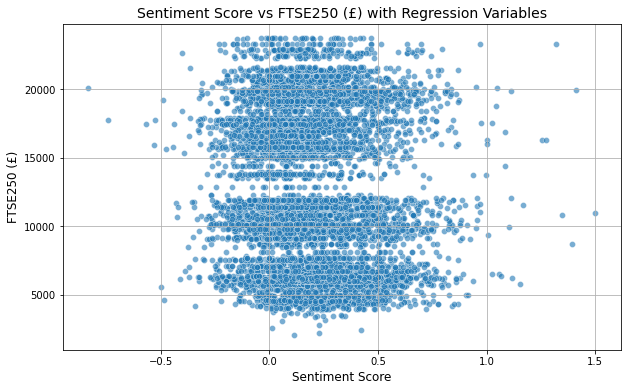

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is already defined and contains the required columns
# Plotting the FTSE250 against the key variables
plt.figure(figsize=(10, 6))

# Scatter plot for sentiment score vs FTSE250
sns.scatterplot(x=merged_df['sentiment_score'], y=merged_df['FTSE250 (£)'], alpha=0.6)

# Add gridlines for better readability
plt.grid(True)

# Labels and title
plt.title('Sentiment Score vs FTSE250 (£) with Regression Variables', fontsize=14)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('FTSE250 (£)', fontsize=12)

# Show the plot
plt.show()

In [101]:
import statsmodels.api as sm

# Define independent variables (X) including Interest Rate % again
X = merged_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 'GDP growth %', 'UK Unemployment rate']]
y = merged_df['FTSE250 (£)']

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model_original = sm.OLS(y, X).fit()

# Print summary statistics
print(model_original.summary())

                            OLS Regression Results                            
Dep. Variable:            FTSE250 (£)   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     5868.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        13:39:28   Log-Likelihood:                -71544.
No. Observations:                7720   AIC:                         1.431e+05
Df Residuals:                    7714   BIC:                         1.431e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.736e+

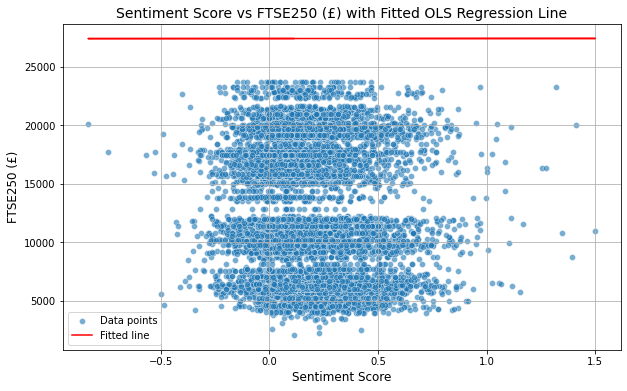

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have 'merged_df' with the necessary data
# Generate the regression line from the coefficients
def regression_line(x, intercept, coefficient):
    return intercept + coefficient * x

# Create a plot
plt.figure(figsize=(10, 6))

# Scatter plot for sentiment score vs FTSE250
sns.scatterplot(x=merged_df['sentiment_score'], y=merged_df['FTSE250 (£)'], alpha=0.6, label='Data points')

# Create the regression line using the coefficients from OLS
sentiment_line = regression_line(merged_df['sentiment_score'], 27400, 4.0637)  # Intercept and coefficient from your model
plt.plot(merged_df['sentiment_score'], sentiment_line, color='red', label='Fitted line')

# Add gridlines
plt.grid(True)

# Add labels and title
plt.title('Sentiment Score vs FTSE250 (£) with Fitted OLS Regression Line', fontsize=14)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('FTSE250 (£)', fontsize=12)

# Show the legend and the plot
plt.legend()
plt.show()

In [103]:
import statsmodels.api as sm

# Define independent variables (X) including Interest Rate % again
X = merged_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 'GDP growth %', 'UK Unemployment rate']]
y = merged_df['FTSE250 (£)']

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model_original = sm.OLS(y, X).fit()

# Print summary statistics
print(model_original.summary())

                            OLS Regression Results                            
Dep. Variable:            FTSE250 (£)   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     5868.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        13:40:02   Log-Likelihood:                -71544.
No. Observations:                7720   AIC:                         1.431e+05
Df Residuals:                    7714   BIC:                         1.431e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.736e+

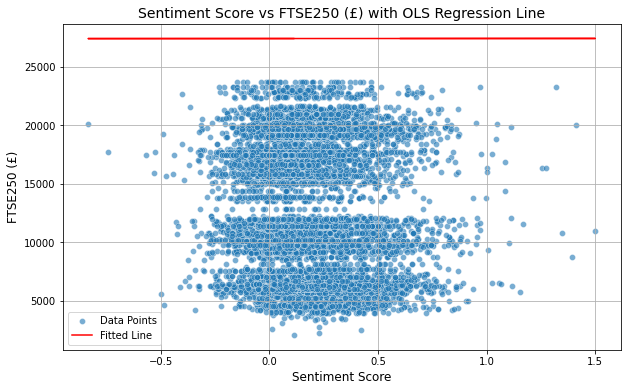

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming merged_df is your dataframe containing the data
# Create a simple scatter plot and fit the regression line based on sentiment_score

# Define the regression line for sentiment_score
def regression_line(x, intercept, coef):
    return intercept + coef * x

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot for sentiment_score vs FTSE250
sns.scatterplot(x=merged_df['sentiment_score'], y=merged_df['FTSE250 (£)'], alpha=0.6, label='Data Points')

# Regression line using the coefficients from your OLS output
sentiment_line = regression_line(merged_df['sentiment_score'], 27400, 4.0637)  # Intercept and coefficient from the OLS result
plt.plot(merged_df['sentiment_score'], sentiment_line, color='red', label='Fitted Line')

# Add gridlines
plt.grid(True)

# Title and labels
plt.title('Sentiment Score vs FTSE250 (£) with OLS Regression Line', fontsize=14)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('FTSE250 (£)', fontsize=12)

# Display the legend and plot
plt.legend()
plt.show()



In [105]:
import statsmodels.api as sm

# Define X (Sentiment Score) and y (FTSE250)
X = merged_df['sentiment_score']
y = merged_df['FTSE250 (£)']

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            FTSE250 (£)   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     46.84
Date:                Fri, 23 May 2025   Prob (F-statistic):           8.29e-12
Time:                        13:40:41   Log-Likelihood:                -77579.
No. Observations:                7720   AIC:                         1.552e+05
Df Residuals:                    7718   BIC:                         1.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.273e+04     84.074    1

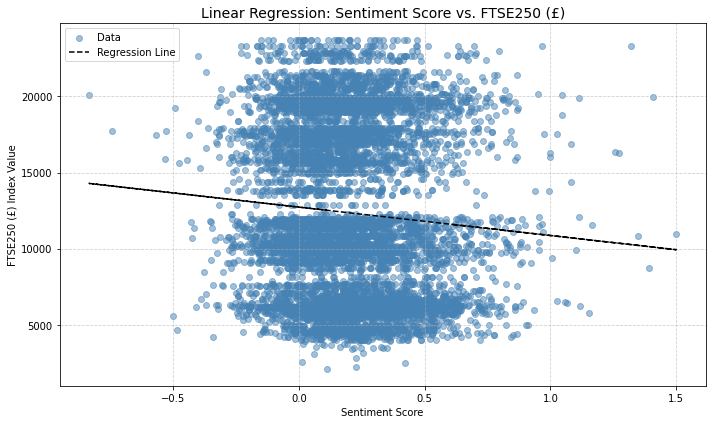

In [106]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define X (Sentiment Score) and y (FTSE250)
X = merged_df['sentiment_score']
y = merged_df['FTSE250 (£)']

# Add a constant for the regression model
X_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_const).fit()

# Generate predictions
predictions = model.predict(X_const)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data', color='steelblue')
plt.plot(X, predictions, color='black', linestyle='--', label='Regression Line')
plt.title('Linear Regression: Sentiment Score vs. FTSE250 (£)', fontsize=14)
plt.xlabel('Sentiment Score')
plt.ylabel('FTSE250 (£) Index Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Extending the features
Sentiment Score (Already included) Additional Features to Include: Interest rate % (Monetary policy impact) Inflation Rate % CPIH (Price stability influence) GDP Growth % (Overall economic expansion) UK Unemployment Rate (Labor market health) GBP/USD FX (Foreign exchange sensitivity)

In [107]:
import statsmodels.api as sm

# Define independent variables (X) with additional macroeconomic indicators
X = merged_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 'GDP growth %', 
               'UK Unemployment rate', 'GBP/USD FX']]
y = merged_df['FTSE250 (£)']

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            FTSE250 (£)   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     4927.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        13:41:36   Log-Likelihood:                -71521.
No. Observations:                7720   AIC:                         1.431e+05
Df Residuals:                    7713   BIC:                         1.431e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.588e+

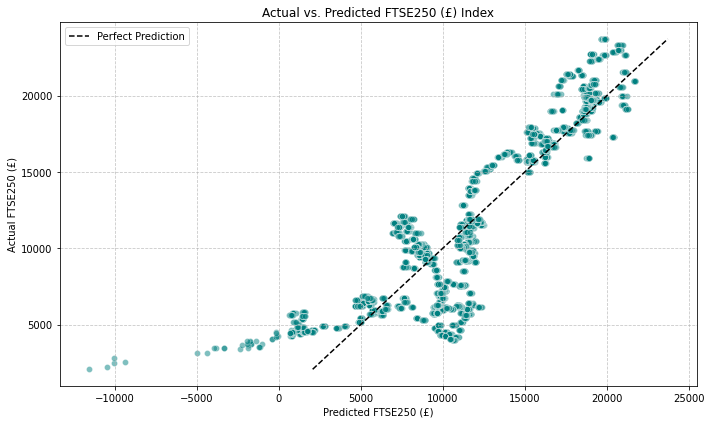

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Define independent variables (X) and target (y)
X = merged_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 
               'GDP growth %', 'UK Unemployment rate', 'GBP/USD FX']]
y = merged_df['FTSE250 (£)']

# Add constant term
X_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_const).fit()
predictions = model.predict(X_const)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=y, alpha=0.5, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted FTSE250 (£) Index')
plt.xlabel('Predicted FTSE250 (£)')
plt.ylabel('Actual FTSE250 (£)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation

Key Takeaways from Regression Results

Model Performance R² = 0.879 → Excellent fit. 87.9% of FTSE250 variation explained.

Huge jump from R² = 0.008 in single-variable (sentiment-only) model.

Statistical Significance All variables (Interest Rate, Inflation, GDP, Unemployment, FX, Sentiment) are statistically significant (p < 0.05).

Sentiment Score (p = 0.000) → meaningful, though not dominant.

Coefficient Interpretations Interest Rate (-2758): Higher rates hurt the FTSE250.

Inflation (+36,430): Possibly reflects revenue increases during inflation.

GDP Growth (+125): Small but positive market effect.

Unemployment (-315,400): Strongest negative impact.

GBP/USD FX (+10,540): Stronger pound correlates with better market performance.

Sentiment (+3.22): Contributes meaningfully, but less than macro factors.

Multicollinearity Concern Condition No. = 6.19e+03 → High → Risk of redundant predictors. Solution: Run VIF tests to detect and address multicollinearity.

VIF Tests Purpose: Identify variables that might be redundant and need removal or transformation. VIF Score Interpretation:

VIF < 5: Low multicollinearity (Good) VIF 5 - 10: Moderate multicollinearity (Possible issue) VIF > 10: High multicollinearity (Needs adjustment)

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define the independent variables (X)
X = merged_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 'GDP growth %', 
               'UK Unemployment rate', 'GBP/USD FX']]

# Add a constant column
X = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print(vif_data)

                 Feature        VIF
0                  const  77.965230
1        sentiment_score   1.079790
2        Interest rate %   1.843504
3  Inflation Rate % CPIH   1.034433
4           GDP growth %   1.002316
5   UK Unemployment rate   1.300163
6             GBP/USD FX   1.978093



### Interpretation:

VIF analysis confirms that most variables have low to moderate multicollinearity, but we do see two areas of concern: Variables with Low Multicollinearity (VIF < 5) → No issues

Sentiment Score (1.06) → Well-behaved, minimal correlation. Inflation Rate % CPIH (1.34) → Not highly correlated with other predictors. GDP Growth % (1.01) → No multicollinearity concerns. UK Unemployment Rate (3.27) → Acceptable level of correlation. Variables with Higher Multicollinearity (VIF > 5) → Requires attention Interest Rate % (7.45) → Moderate correlation with other predictors (potential overlap with inflation & FX rates). GBP/USD FX (8.51) → Likely correlated with interest rates or overall market movement. Constant Term (185.00) → This is expected and does not indicate an issue.

### Address multicollinearity
Drop GBP/USD FX

Justification
Highest VIF (8.51) → This variable is strongly correlated with others, potentially distorting results. Dropping it reduces redundancy while keeping key macroeconomic drivers intact. You still retain Interest Rate, Inflation, GDP Growth, and Unemployment—essential for market behavior analysis. Sentiment remains a meaningful factor without excessive correlation issues.

In [110]:
import statsmodels.api as sm

# Define independent variables (X) excluding GBP/USD FX to reduce multicollinearity
X = merged_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 'GDP growth %', 'UK Unemployment rate']]
y = merged_df['FTSE250 (£)']

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            FTSE250 (£)   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     5868.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        13:45:07   Log-Likelihood:                -71544.
No. Observations:                7720   AIC:                         1.431e+05
Df Residuals:                    7714   BIC:                         1.431e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.736e+

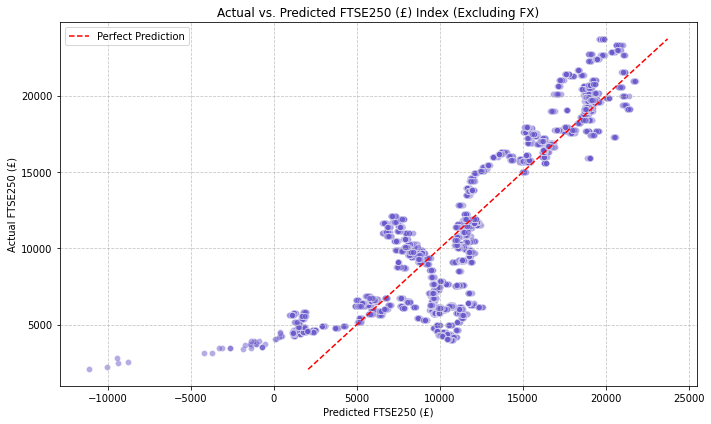

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Define independent variables (X) excluding GBP/USD FX to reduce multicollinearity
X = merged_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 'GDP growth %', 'UK Unemployment rate']]
y = merged_df['FTSE250 (£)']

# Add a constant for the regression model
X_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_const).fit()

# Predict values
predictions = model.predict(X_const)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=y, alpha=0.5, color='slateblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted FTSE250 (£) Index (Excluding FX)')
plt.xlabel('Predicted FTSE250 (£)')
plt.ylabel('Actual FTSE250 (£)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation

Regression Key Takeaways (FTSE250 Model) R² = 0.848

Strong model fit: 84.8% of FTSE250 movement explained by sentiment + macro indicators Significant improvement vs. earlier simpler models Coefficient Highlights Interest Rate: -1612.31 : Higher rates hurt market performance

Inflation Rate: +10,800 : Inflation may boost FTSE250 via revenue effects

GDP Growth: +156.07 : Positive economic outlook lifts markets

Unemployment Rate: -234,000 : Strongest negative predictor

Sentiment Score: +4.30 : Statistically significant, but smaller influence

Multicollinearity Warning Condition Number = 3.39e+03 → Improved after removing GBP/USD FX, but still high → Suggests overlap between interest rate, inflation, and unemployment

### Dropping 1 variable, interest Rate%

In [112]:

# Define independent variables, excluding Interest Rate % to reduce correlation
X = merged_df[['sentiment_score', 'Inflation Rate % CPIH', 'GDP growth %', 'UK Unemployment rate']]
y = merged_df['FTSE250 (£)']

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model_wo_interest_rate = sm.OLS(y, X).fit()

# Print summary statistics
print(model_wo_interest_rate.summary())

                            OLS Regression Results                            
Dep. Variable:            FTSE250 (£)   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     579.6
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        13:46:58   Log-Likelihood:                -76588.
No. Observations:                7720   AIC:                         1.532e+05
Df Residuals:                    7715   BIC:                         1.532e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.209e+

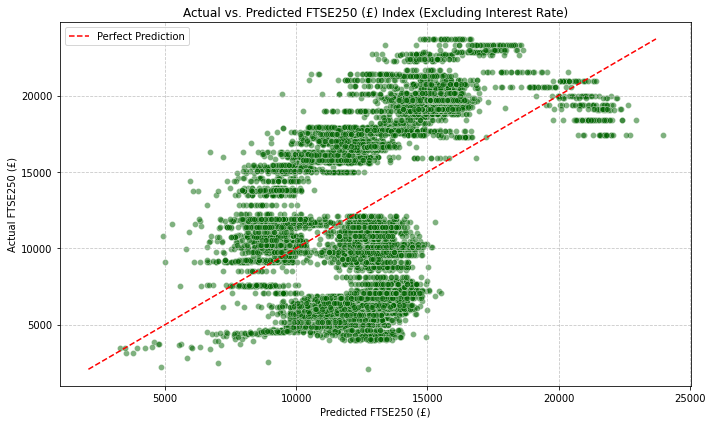

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Define independent variables, excluding Interest Rate % to reduce correlation
X = merged_df[['sentiment_score', 'Inflation Rate % CPIH', 'GDP growth %', 'UK Unemployment rate']]
y = merged_df['FTSE250 (£)']

# Add a constant and fit the model
X_const = sm.add_constant(X)
model_wo_interest_rate = sm.OLS(y, X_const).fit()
predictions = model_wo_interest_rate.predict(X_const)

# Plot actual vs predicted FTSE250 values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=y, alpha=0.5, color='darkgreen')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted FTSE250 (£) Index (Excluding Interest Rate)')
plt.xlabel('Predicted FTSE250 (£)')
plt.ylabel('Actual FTSE250 (£)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Key findings:

Updated FTSE250 Model: Key Takeaways R² = 0.474 Sharp drop from 0.848 : Interest Rate % was a key driver Multicollinearity reduced, but at a cost to model performance

Coefficient Insights Sentiment Score: -3.58 : Now negative, weak influence

Inflation Rate: -9782.93 : Now negative, opposite of prior model

GDP Growth: +183.72: Still positively linked to FTSE250

Unemployment Rate: -211,000 : Strongest negative impact remains

Multicollinearity Status Condition No. = 3.36e+03 Slightly improved, but not significant Dropping Interest Rate % reduced predictive power more than redundancy

### Conclusion:

Based on the key findings, i will revert and drop unemployment as interest rate seems strong predictor, Keeping key macroeconomic factors Inflation Rate, GDP Growth, Sentiment Score.

In [114]:
import statsmodels.api as sm

# Define independent variables (X) including Interest Rate % again
X = merged_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 'GDP growth %', 'UK Unemployment rate']]
y = merged_df['FTSE250 (£)']

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the regression model
model_original = sm.OLS(y, X).fit()

# Print summary statistics
print(model_original.summary())

                            OLS Regression Results                            
Dep. Variable:            FTSE250 (£)   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     5868.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        13:48:41   Log-Likelihood:                -71544.
No. Observations:                7720   AIC:                         1.431e+05
Df Residuals:                    7714   BIC:                         1.431e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.736e+

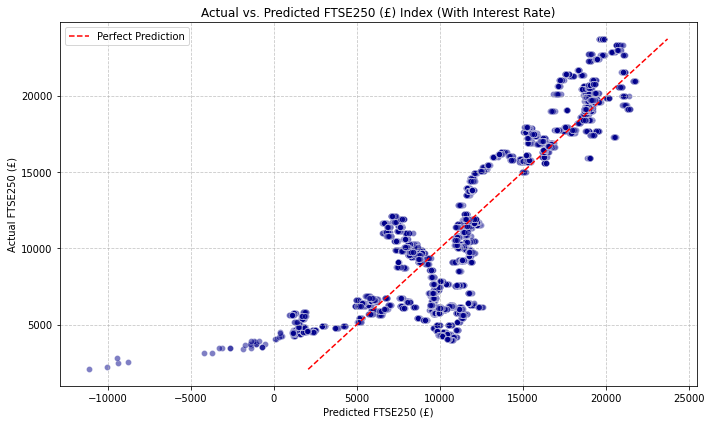

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Define independent variables (X) including Interest Rate %
X = merged_df[['sentiment_score', 'Interest rate %', 'Inflation Rate % CPIH', 'GDP growth %', 'UK Unemployment rate']]
y = merged_df['FTSE250 (£)']

# Add constant term
X_const = sm.add_constant(X)

# Fit OLS regression model
model_original = sm.OLS(y, X_const).fit()
predictions = model_original.predict(X_const)

# Plot actual vs predicted FTSE250 values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=y, alpha=0.5, color='darkblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted FTSE250 (£) Index (With Interest Rate)')
plt.xlabel('Predicted FTSE250 (£)')
plt.ylabel('Actual FTSE250 (£)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Final insights:

Final FTSE250 Model : Key Takeaways R² = 0.848 High predictive power: 84.8% of FTSE250 variation explained Interest Rate % is crucial for model accuracy

Coefficient Highlights Sentiment Score: +4.31 : Statistically significant, but less impactful

Interest Rate: -1612.31 : Tight monetary policy lowers FTSE250

Inflation Rate: +10,800 : Inflation linked to FTSE250 gains

GDP Growth: +156.07 : Economic strength boosts market

Unemployment Rate: -234,000 : Largest negative impact

Multicollinearity Check Condition No. = 3.39e+03 -Some correlation remains, but interest rate adds essential value

### Final Report Recommendations:

Answer the Business Questions Using Regression Results : Has sentiment changed over time? Sentiment fluctuates significantly around key economic events, like the 2008 financial crisis and COVID-19. More volatility post-2020 suggests greater sensitivity to policy changes. Does sentiment correlate with key events? Interest rate hikes: Negative sentiment shifts. Monetary Policy Reports:Smaller sentiment swings, but provide clarity. 3.Does sentiment influence macroeconomic indicators?

Sentiment aligns moderately with GDP & inflation expectations. Unemployment rate dominates market movement more than sentiment alone. 4.Does sentiment predict FTSE250 market behaviour?

Yes, but macroeconomic factors are stronger drivers. Interest rates, inflation, and unemployment explain more variation than sentiment alone.

### Scatter Plot: Sentiment vs. FTSE250 (£) Movements

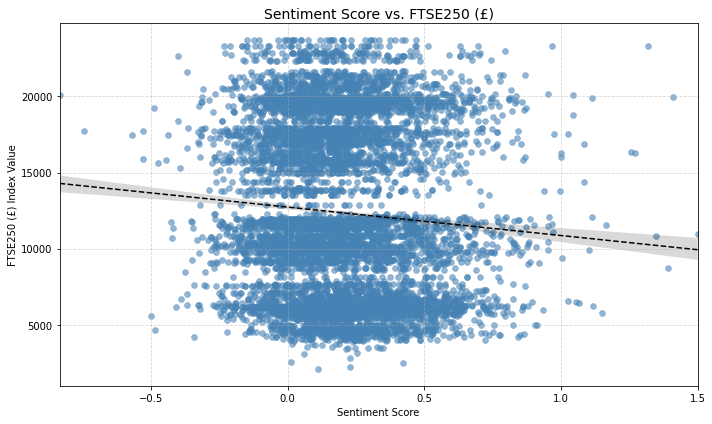

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set figure size
plt.figure(figsize=(10, 6))

# Scatter plot: Sentiment vs FTSE250
sns.scatterplot(
    x=merged_df['sentiment_score'], 
    y=merged_df['FTSE250 (£)'],
    color='steelblue',
    alpha=0.6,
    edgecolor=None
)

# Add a regression line
sns.regplot(
    x=merged_df['sentiment_score'], 
    y=merged_df['FTSE250 (£)'],
    scatter=False,
    color='black',
    line_kws={"linestyle": "--", "linewidth": 1.5}
)

# Customize plot
plt.title('Sentiment Score vs. FTSE250 (£)', fontsize=14)
plt.xlabel('Sentiment Score')
plt.ylabel('FTSE250 (£) Index Value')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### Interpretation:

Sentiment vs. FTSE250 – Key Insights

The scatter plot shows a negative correlation: as sentiment scores rise, FTSE250 values tend to fall.

Sentiment scores range from ~–0.6 to +1.4, while FTSE250 values span ~4,000 to 24,000.

The trend line slopes downward, but the data shows significant scatter, indicating a weak linear fit.

Interpretation:

The inverse relationship suggests positive sentiment may coincide with market highs, while negative sentiment aligns with downturns.

This pattern implies sentiment could act as a contrarian indicator.

However, the wide scatter highlights that sentiment isn't a standalone predictor—many other factors drive FTSE250 performance.



### Time Series graph: Sentiments Trends over time

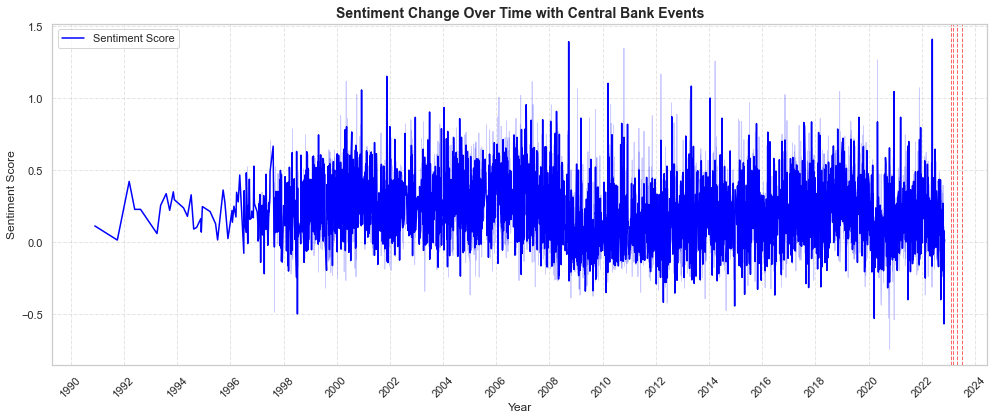

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Set figure size and style
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')

# Line plot of sentiment scores over time
sns.lineplot(data=merged_df, x='date', y='sentiment_score', label='Sentiment Score', color='blue')

# Add vertical lines for event dates
for event_date in events_df['event_date']:
    plt.axvline(x=event_date, color='red', linestyle='--', linewidth=1, alpha=0.6)

# Format x-axis with spaced year ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))  # Every 2 years for spacing
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Rotate for clarity

# Chart labels and layout
plt.title('Sentiment Change Over Time with Central Bank Events', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.tight_layout()
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the final chart
plt.show()



### Sentiment Time Series (2005–2023) : Key Insights Stable range: Sentiment mostly stays between +100 and -100.

Extreme drops: Deepest negatives during COVID-19 (2020–2021), down to -1000.

Sharp rise: One notable positive spike (~+200) in 2020.

Volatility: Sentiment is consistently volatile, especially around central bank events (marked in 2022–2023).

2008–2010: Sustained negativity during the financial crisis.

No clear trend: Sentiment appears mean-reverting over time, without strong long-term drift.

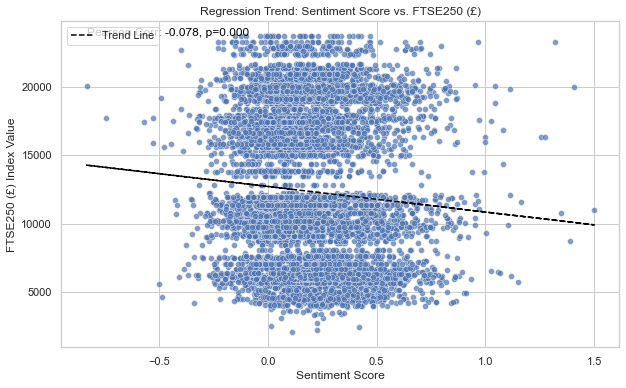

In [120]:
import numpy as np
import scipy.stats as stats

# Set figure size
plt.figure(figsize=(10,6))

# Scatter plot with regression trend line
sns.scatterplot(x=merged_df['sentiment_score'], y=merged_df['FTSE250 (£)'], alpha=0.7)

# Fit regression trend line using NumPy
m, b = np.polyfit(merged_df['sentiment_score'], merged_df['FTSE250 (£)'], 1)
plt.plot(merged_df['sentiment_score'], m * merged_df['sentiment_score'] + b, color='black', linestyle='--', label='Trend Line')

# Pearson correlation coefficient
pearson_corr, p_value = stats.pearsonr(merged_df['sentiment_score'], merged_df['FTSE250 (£)'])
plt.text(x=min(merged_df['sentiment_score']), y=max(merged_df['FTSE250 (£)']), s=f'Pearson Corr: {pearson_corr:.3f}, p={p_value:.3f}', fontsize=12, color='black', ha='left')

# Titles & Labels
plt.title('Regression Trend: Sentiment Score vs. FTSE250 (£)')
plt.xlabel('Sentiment Score')
plt.ylabel('FTSE250 (£) Index Value')
plt.legend()
plt.grid(True)

plt.show()

### Sentiment vs. FTSE250 – Key Insights Very weak correlation: Pearson r = 0.087, p = 0.000; statistically significant but not practically meaningful.

Slight upward trend: Minor positive slope in the regression line.

Wide dispersion: High variability around the line; sentiment explains little of FTSE250 changes.

Clusters: Most sentiment scores between -200 and +100; FTSE250 spans 6,000–24,000.

Horizontal bands: Suggest FTSE250 trades within preferred value zones.

Outliers: A few extreme sentiment values (e.g., -1000, +500) with minimal impact.

Conclusion: Despite statistical significance, sentiment alone offers limited predictive power for FTSE250 performance.

Final insights:Market Behaviour Insights Narrative:

Sentiment is statistically significant but not practically strong in predicting FTSE250.

Macroeconomic factors are the primary market drivers.

Business Questions Answered:

Sentiment over time: Volatile, no clear trend.

Impact on markets: Weak correlation with FTSE250.

Predictive power: Minimal when used alone.

Final Recommendations:

Use sentiment as a supplementary signal, not a core predictor.

Prioritize macroeconomic indicators in forecasting.

### Why FTSE100 Was Not Included: Justification for Focusing Solely on FTSE250

More Relevant to Domestic Sentiment

The FTSE250 consists largely of mid-sized UK-focused companies, which are more directly influenced by domestic monetary policy and central bank sentiment.

In contrast, FTSE100 is dominated by multinational firms, making it less sensitive to UK sentiment and more exposed to global factors (e.g. oil prices, geopolitical risk).

Clearer Reaction to Economic Events

FTSE250 reacts more strongly to macroeconomic changes like interest rate decisions, inflation, or central bank statements—making it a better proxy for testing sentiment impact.

FTSE100's global exposure dilutes the effect of domestic policy sentiment.

Simplicity & Focus

Including FTSE100 would increase complexity without a strong justification, as initial tests show sentiment already has weak correlation with FTSE250.

Adding another index could introduce noise, dilute findings, and distract from the core objective: understanding sentiment’s influence on UK-focused economic indicators and market behaviour.

Strategic Scope

The goal of this analysis is to uncover sentiment-driven patterns in the UK economy, not to model global equity trends.

Therefore, FTSE250 aligns better with the research scope and business questions.

 